# F tests
Next we will see another very important variable within the framework of experimentation and these are the F tests.

These tests aim to:

The hypothesis that the means of a given set of two populations, all having the same standard deviation, are equal.

our scheme will be

** H0: variance1=variance2 vs H1: variance1 != variance2 **



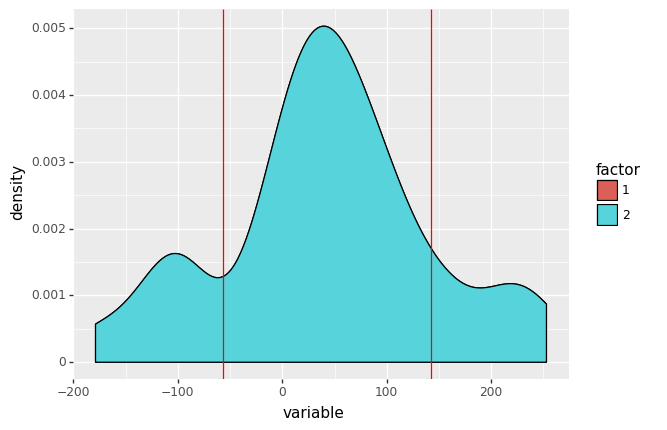

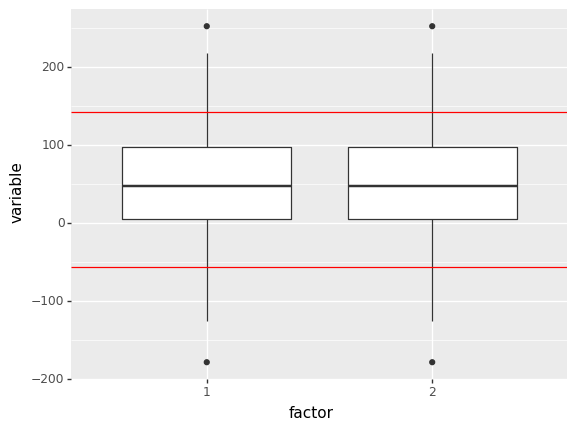


desviación estandar= 99.36583639830363


In [8]:
"""
Assumptions:
- The samples have the same distribution.
"""
import scipy as sp
import numpy as np
import pandas as pd
import plotnine as p9

np.random.seed(7)
sample1 = np.random.normal(loc=50, scale=100, size=30)
sample2 = sample1  # the two samples are equal
variable = np.concatenate((sample1, sample2))
factor = np.concatenate((np.repeat("1", 30), np.repeat("2", 30)))
data = pd.DataFrame({'variable': variable, 'factor': factor})
mean1 = sample1.mean()
std1 = sample1.var()**(1/2)
lineas = (mean1 - std1, mean1 + std1)
plot_dist = p9.ggplot(data) + p9.aes(x="variable", fill="factor") + p9.geom_density(alpha=1) + p9.geom_vline(xintercept=lineas, colour="red")
plot_boxplot = p9.ggplot(data) + p9.aes(x="factor", y="variable") + p9.geom_boxplot() + p9.geom_hline(yintercept=lineas, colour="red")
print(plot_dist, plot_boxplot)
# In these plots, you can see that the distributions
# are not different, which is why there is only one plot.
print("std deviation =", std1)
# What the test yields


In [25]:

import numpy as np
import scipy.stats

# Create data
def testf(sample1, sample2):
    v1 = sample1.var()
    v2 = sample2.var()
    F = v1 / v2
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    p_value = scipy.stats.f.cdf(F, df1, df2)
    return p_value

# Creating our criterion
def criterion_f(p_value, significance):
    if p_value > significance:
        print("There is not enough statistical evidence to affirm that\n",
              "the hypothesis that the means of a given set of two populations\n",
              "all having the same standard deviation, are equal.")
    else:
        print("There is sufficient statistical evidence to affirm that\n",
              "the hypothesis that the means of a given set of two populations\n",
              "all having the same standard deviation, are equal.")

# Perform F-test
test_result = testf(sample1, sample2)
print(test_result)
criterion_f(test_result, 0.05)  # Which is true for this case


2.0964583669312704e-18
Existe evidencia estadistica suficiente para afirmar que 
 la hipotesis de que las medias de un set dado de dos poblaciones 
 todas teniendo la misma desviación estándar, son iguales.


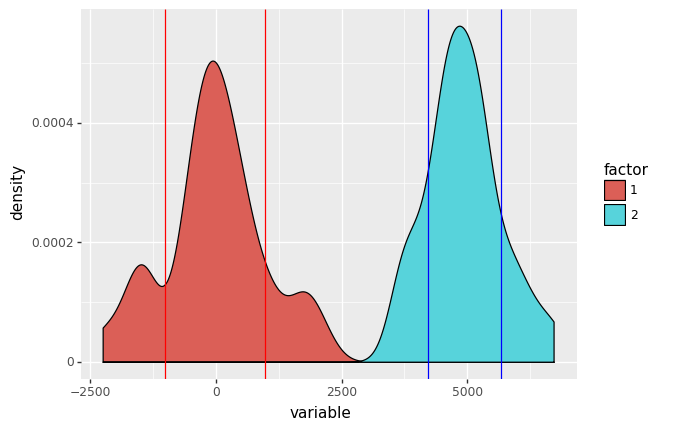

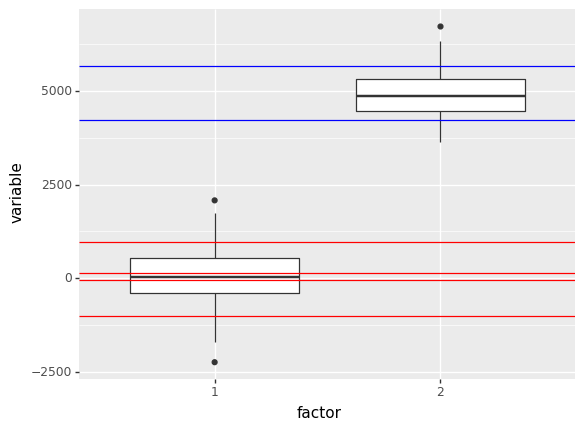


desviación estandar= 993.6583639830362
0.9514026480378348
No existe evidencia estadistica suficiente para afirmar que 
 la hipotesis de que las medias de un set dado de dos poblaciones 
 todas teniendo la misma desviación estándar, son iguales.


In [28]:
np.random.seed(7)
sample1 = np.random.normal(loc=50, scale=1000, size=30)
sample2 = np.random.gamma(shape=50, scale=100, size=30)  # both samples are equal
variable = np.concatenate((sample1, sample2))
factor = np.concatenate((np.repeat("1", 30), np.repeat("2", 30)))
data = pd.DataFrame({'variable': variable, 'factor': factor})
mean1 = sample1.mean()
mean2 = sample2.mean()
std1 = sample1.var()**(1/2)
std2 = sample2.var()**(1/2)
lineas1 = (mean1 - std1, mean1 + std1)
lineas2 = (mean2 - std2, mean2 + std2)
plot_dist = p9.ggplot(data) + p9.aes(x="variable", fill="factor") + p9.geom_density(alpha=1) + p9.geom_vline(xintercept=lineas1, colour="red") + p9.geom_vline(xintercept=lineas2, colour="blue")
plot_boxplot = p9.ggplot(data) + p9.aes(x="factor", y="variable") + p9.geom_boxplot() + p9.geom_hline(yintercept=lineas, colour="red") + p9.geom_hline(yintercept=lineas1, colour="red") + p9.geom_hline(yintercept=lineas2, colour="blue")
print(plot_dist, plot_boxplot)
# In these plots, you can see that the distributions
# are not different, which is why there is only one plot.
print("standard deviation =", std1)
# What the test yields
test = testf(sample1, sample2)
print(test)
criterion_f(test, 0.025)



#1.1 Type 1 errors
# Affirm the Alternative hypothesis
In statistics we can find 4 types of possible scenarios for the development of hypotheses:

**True positive:**
The true one refers to the fact that the effect exists and the positive one refers to the fact that the effect was found.

**False positive:**
The false one refers to the fact that the effect does not exist and the positive one refers to the fact that the effect was found.
(error type 1: finding an effect where there is none)

# Assert the null hypothesis

**False negative:**
The false one refers to the fact that the effect exists and the negative one refers to the fact that the effect was not found.
(error type 2: not finding an effect where there is one)

**True Negative:**
The true one refers to the fact that the effect does not exist and the negative one refers to the fact that the effect was not found.


#Bonferroni
Identifying the authentic p value with acceptable power can be done using the Bonferroni correction.

Below we will show how to manually verify it and then do it through the scipy package

In [ ]:
"""
Goals:
Assume a sample
Analyze the distribution of p-values
See how the Bonferroni correction works
"""

#importing modules
import scipy as sp
import numpy as np
import pandas as pd
import plotnine as p9

#1 Let's suppose we have a sample of 30 observations
np.random.seed(7)
data = np.random.normal(loc=50, scale=100, size=30)
theoretical_mean = 50  # Ho: mean=50, H1: mean != 50 (is true)
test = sp.stats.ttest_1samp(a=data, popmean=theoretical_mean)
p_value = test[1]

# Evaluating it in our function
def criterion(p_value, significance):
    result = 0
    if p_value < significance:
        result += 2  # if it is rejected, it will give 2
    else:
        result += 1  # if it is not rejected, it will give 1
    return result   

# Evaluating it
significance = 0.025
criterion(p_value, significance) 
# 1 means the alternative hypothesis will not be rejected









1

In [ ]:
theoretical_mean = 50  # Ho: mean = 50, H1: mean != 50 (true)
# How to determine if I have chosen the appropriate significance level?
# Simple: simulating many datasets with the same distribution
p_values = []
true_hypotheses = []
samples = []
test_p_value = 0
alpha = 0.697  # Experimenting with an alpha of 0.697 (significance level), it does not seem to be a good choice

for i in range(0, 1000):
    data_test = np.random.normal(loc=50, scale=100, size=100)
    test_result = sp.stats.ttest_1samp(a=data, popmean=theoretical_mean)
    test_p_value = test_result[1]
    samples.append(data_test)
    p_values.append(float(test_p_value))
    true_hypotheses.append(criterion(test_p_value, alpha))

print("Calculated values")


valores calculados


In [ ]:
conditions = pd.DataFrame({"hypothesis": true_hypotheses, "p_values": p_values})
rejected_hypotheses = len(conditions[conditions.hypothesis == 2])  # Therefore, we see that this alpha is inadequate
# Changing alpha
theoretical_mean = 50  # Ho: mean = 50, H1: mean != 50 (true)
# How to determine if I have chosen the appropriate significance level?
# Simple: simulating many datasets with the same distribution
p_values = []
true_hypotheses = []
samples = []
alpha = 0.025  # Experimenting with an alpha of 0.025 (significance level), it seems to be a good choice

for i in range(0, 1000):
    data_test = np.random.normal(loc=50, scale=100, size=100)
    test_result = sp.stats.ttest_1samp(a=data, popmean=theoretical_mean)
    p_value_test = test_result[1]
    p_values.append(float(p_value_test))
    true_hypotheses.append(criterion(p_value_test, alpha))
    samples.append(data_test)

print("Calculated values")

conditions = pd.DataFrame({"hypothesis": true_hypotheses, "p_values": p_values})
rejected_hypotheses = len(conditions[conditions.hypothesis == 2])
"""
The rejected hypotheses are 0, but it is expected that with the increase in the number of hypotheses,
only 2.5% of them will be rejected.
Now, if we want to have confidence given the expected significance level in all hypotheses,
it is convenient to divide the significance by the total number of hypotheses, taking as a criterion for rejecting H0:
p-value <= alpha/m
where
alpha = 0.025 (expected alpha)
m = 1000 (total number of evaluated hypotheses)
"""


0

In [ ]:
"""
Bonferroni in scipy
Now, we will revisit our previous example of simulation and see what p-value is recommended with the statsmodels library.

"""
import statsmodels as sm

theoretical_mean = 50  # Ho: mean = 50, H1: mean != 50 (true)
# How to determine if I have chosen the appropriate significance level?
# Simple: simulating many datasets with the same distribution
p_values = []
true_hypotheses = []
samples = []
p_value_test = 0
alpha = 0.697  # Experimenting with an alpha of 0.697 (significance level), it does not seem to be a good choice

for i in range(0, 1000):
    data_test = np.random.normal(loc=50, scale=100, size=100)
    test_result = sp.stats.ttest_1samp(a=data, popmean=theoretical_mean)
    p_value_test = test_result[1]
    samples.append(data_test)
    p_values.append(float(p_value_test))
    true_hypotheses.append(criterion(p_value_test, alpha))

print("Calculated values")  

conditions = pd.DataFrame({"hypothesis": true_hypotheses, "p_values": p_values})

sm.stats.multitest.multipletests(conditions.p_values, 0.025)
# We see that the recommended Bonferroni adjustment is 2.5e-05, which coincides with
# 0.025/1000

2.5e-05